In [55]:
# importing all the libraries
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer

In [42]:
train = pd.read_csv('tweet-sentiment-dataset/train.csv')
test = pd.read_csv('tweet-sentiment-dataset/test.csv')

In [43]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [44]:
# shape of the data
print(train.shape)
print(test.shape)

(27481, 4)
(3534, 3)


In [45]:
# basic info of the  train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [46]:
train.dropna(inplace=True)

In [47]:
# basic info of the  test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [48]:
# basic stats of data
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,af36799256,Disturbed. They sold the baby tiger I met in T...,good,neutral
freq,1,1,199,11117


In [49]:
# Lets look at the distribution of tweets in the train set
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


<AxesSubplot:xlabel='sentiment', ylabel='count'>

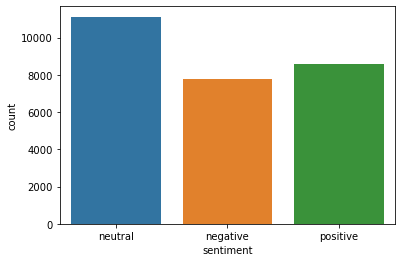

In [50]:
# lets visulaize the data
sns.countplot(x='sentiment',data=train)

In [51]:
train[train['sentiment']=='positive']

,textID,text,selected_text,sentiment
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive
11,16fab9f95b,I really really like the song Love Story by Ta...,like,positive
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive
...,...,...,...,...
27467,432e6de6c9,morning twit-friends! welcome to my new followers,welcome,positive
27474,8f14bb2715,So I get up early and I feel good about the da...,I feel good ab,positive
27475,b78ec00df5,enjoy ur night,enjoy,positive
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive


In [52]:
# creating the corpus
def clean_text(text):
#     '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
#     and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [53]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [54]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative


In [56]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train['selected_text'])

In [58]:
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(train_vectors , y_train)

In [59]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['encoded']= label_encoder.fit_transform(train['sentiment'])
  
train['encoded'].unique()

array([1, 0, 2])

In [62]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(train_vectors , train['encoded'])

SVC(kernel='linear')

In [63]:
pred = classifier.predict(train_vectors)

In [64]:
report  = classification_report(pred , train['encoded'] , output_dict=True)
report

{'0': {'precision': 0.881377714946665,
  'recall': 0.9340779079269954,
  'f1-score': 0.9069629041856775,
  'support': 7342},
 '1': {'precision': 0.9537645048124495,
  'recall': 0.8755573905862923,
  'f1-score': 0.9129891936108839,
  'support': 12110},
 '2': {'precision': 0.9027033325565136,
  'recall': 0.9649975087194819,
  'f1-score': 0.9328115593016255,
  'support': 8028},
 'accuracy': 0.9173216885007278,
 'macro avg': {'precision': 0.9126151841052094,
  'recall': 0.9248776024109232,
  'f1-score': 0.9175878856993956,
  'support': 27480},
 'weighted avg': {'precision': 0.91950748508664,
  'recall': 0.9173216885007278,
  'f1-score': 0.9171700136547488,
  'support': 27480}}